Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "1"
DATE = "04/10"

---

# TD 2: Graphiques et structuration d'un code

## Exercice 1 : Exemple de programme structuré

Reprenons un exemple de L1 de programme mis en forme.

Les fonctions montrent toute leur utilité lorsque les blocs d'instructions qu'elles contiennent sont amenés à être utilisés plusieurs fois dans un programme ou encore appelés par d'autres fonctions. Une des règles d'or de la programmation est que lorsqu'un bloc d'instruction apparaît deux fois dans un programme, c'est qu'il mérite d'être mis dans une fonction ! Ainsi lors du débuggage du programme ou lors de son évolution, il n'est nécessaire de ne modifier le bloc qu'une fois (dans la fonction) et non dans ces multiples écritures le long du programme.

Dans le programme suivant, l'objectif est de montrer numériquement l'égalité suivante :
$$\sum_{k=0}^{n} \binom{n}{k} x^k = (1+x)^n$$

Il va falloir calculer de nombreuses factorielles, ainsi que des coefficients binomiaux, calculer une somme et tester son égalité. Un bon réflexe à avoir est donc d'identifier tous les sous-blocs d'instructions à mettre sous forme de fonction avant d'écrire le programme. 

In [2]:
###################################
# Importation des fonctions externes
import numpy as np

###################################
# Definition locale des fonctions

def factorielle(n):
    """ Calcule la factorielle de n """   # ces commentaires decrivent fonction et arguments
    f = np.arange(1,n+1)
    return np.prod(f)

def k_parmi_n(k,n):
    """ Calcule le coefficient binomiaux k parmi n """
    c = factorielle(n)/( factorielle(k)*factorielle(n-k) )  # fonction factorielle appelee ici
    return c

def somme(x,n,verbose=False):
    """ Calcule la somme des k parmi n fois x exposant k """
    k = np.arange(n+1)
    elements = [k_parmi_n(k,n)*x**k for k in range(n+1)]
    s = np.sum(elements)
    if verbose : print('La somme pour n =',n,' et x =',x,'vaut',s)
    return s

Nous pouvons ensuite tester ces fonctions (toute en même temps ici).

In [3]:
def test_somme(x,n,verbose=False):
    """ Teste l'egalite de l'enonce """
    polynom = (1+x)**n
    s = somme(x,n,verbose)
    #test = s == polynom 
    #nouveau test adapte aux floats
    eps = 1E-5
    test = abs(somme(x,n)-(1+x)**n)<1E-5
    if verbose :
        if test : print('Egalite OK')
        else: print('Egalite non verifiee')
    return test

###################################
# Corps principal du programme

print("Factorielle 3 : ", factorielle(3))
print("2 parmi 4 : ", k_parmi_n(2,3))
test_somme(x=1,n=5,verbose=True)

Factorielle 3 :  6
2 parmi 4 :  3.0
La somme pour n = 5  et x = 1 vaut 32.0
Egalite OK


True

Vous pouvez bien sûr effectuer d'autres tests dans des cas particuliers pour vérifier que l'égalité est vérifiée. Par exemple :

In [4]:
for x in np.arange(1,2.0,0.2):
    for n in range(5,10):
        test_somme(x,n,verbose=True)

La somme pour n = 5  et x = 1.0 vaut 32.0
Egalite OK
La somme pour n = 6  et x = 1.0 vaut 64.0
Egalite OK
La somme pour n = 7  et x = 1.0 vaut 128.0
Egalite OK
La somme pour n = 8  et x = 1.0 vaut 256.0
Egalite OK
La somme pour n = 9  et x = 1.0 vaut 512.0
Egalite OK
La somme pour n = 5  et x = 1.2 vaut 51.53631999999999
Egalite OK
La somme pour n = 6  et x = 1.2 vaut 113.37990399999998
Egalite OK
La somme pour n = 7  et x = 1.2 vaut 249.43578879999995
Egalite OK
La somme pour n = 8  et x = 1.2 vaut 548.75873536
Egalite OK
La somme pour n = 9  et x = 1.2 vaut 1207.2692177919998
Egalite OK
La somme pour n = 5  et x = 1.4 vaut 79.62624
Egalite OK
La somme pour n = 6  et x = 1.4 vaut 191.10297599999996
Egalite OK
La somme pour n = 7  et x = 1.4 vaut 458.6471423999999
Egalite OK
La somme pour n = 8  et x = 1.4 vaut 1100.7531417599998
Egalite OK
La somme pour n = 9  et x = 1.4 vaut 2641.8075402239992
Egalite OK
La somme pour n = 5  et x = 1.5999999999999999 vaut 118.81375999999997
Egalite O

## Exercice 2 : Dérivée d'une fonction

Mathématiquement, la dérivée d'une fonction $f(x)$ au point $x$ est définie par :

$$ f'(x) = \lim\limits_{\epsilon \rightarrow 0} \frac{f(x+\epsilon)-f(x)}{\epsilon} $$

Numériquement, comme la fonction est discrétisée en $\left\lbrace x_i\right\rbrace$ points, on peut essayer d'approcher cette définition du mieux possible en calculant le taux d'accroissement de la fonction entre deux points les plus proches possibles:

$$f'(x_i) = \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_{i}} $$


- La ligne de commande ci dessous permet d'afficher les graphiques directement dans le notebook. Exécutez la. 

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Définissez et tracez la fonction $f(x)=e^{ax}$ avec 10 points pour $x\in[0,2]$ et $a=1,2$ (tracez une légende pour y voir plus clair)

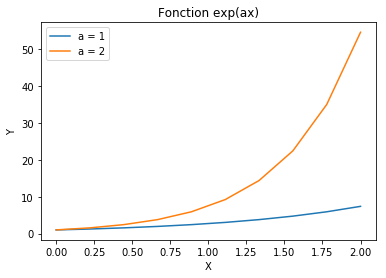

In [6]:
import matplotlib.pyplot as plt

#fonction f(x) = exp(ax)
def exp_a (x, a) :
    return np.exp(a*x)

#Données
X= np.linspace(0,2,10)
Y_1 = exp_a(X, 1)
Y_2 = exp_a(X, 2)

#Tracé du graphique

fig= plt.figure()
plt.plot(X,Y_1, label = 'a = 1')
plt.plot(X,Y_2, label= 'a = 2')
plt.title('Fonction exp(ax)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

    
    

- Définissez une fonction qui calcule la dérivée d'une fonction à partir de la donnée des deux listes d'abscisses et d'ordonnées des 10 points tracés précédemment. Attention aux nombre de points utilisés !

In [7]:
# fonction dérivée 
# Attention renvoie une liste Y de taille len(Y)-1. Retirer le dernier point de la liste x
def derivee(X,Y):
    Y_der= np.array([(Y[i+1] - Y[i])/(X[i+1]-X[i]) for i in range(0,len(X)-1)])
    return Y_der

- Dans un même graphique, tracez la fonction $exp(ax)$ et sa dérivée pour a =1. 

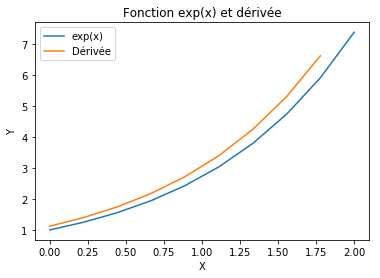

In [8]:
#Données
X_der = np.delete(X,-1)
Y_der1 = derivee(X, Y_1)

#Tracé du graphique

fig= plt.figure()
plt.plot(X,Y_1, label = 'exp(x)')
plt.plot(X_der,Y_der1, label= 'Dérivée')
plt.title('Fonction exp(x) et dérivée')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Que constatez-vous pour $a=1$ ?

Les courbes sont proches mais ne se supperposent pas, alors que exp'(x)=exp(x)

- Pour tenter de remédier au problème, augmentez le nombre de points. Que constatez-vous ?

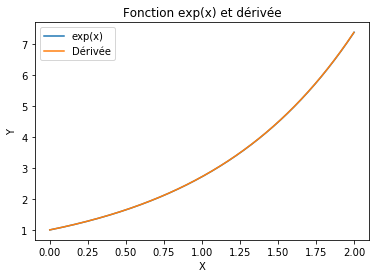

In [9]:
#Données
X= np.linspace(0,2,1000)
Y_1 = exp_a(X, 1)
X_der = np.delete(X,-1)
Y_der1 = derivee(X, Y_1)

#Tracé du graphique

fig= plt.figure()
plt.plot(X,Y_1, label = 'exp(x)')
plt.plot(X_der,Y_der1, label= 'Dérivée')
plt.title('Fonction exp(x) et dérivée')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


- Une autre façon de résoudre le problème peut être de symétriser la formule du taux d'accroissement :
$$ f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}} $$
Coder cette façon d'exprimer la dérivée et testez la pour N=10 points.

In [10]:
# fonction dérivée symétrique
# Attention renvoie une liste Y de taille len(Y)-2. Retirer le premier et le dernier point de la liste x pour ploter
def derivee_sym(X,Y):
    Y_der= np.array([(Y[i+1] - Y[i-1])/(X[i+1]-X[i-1]) for i in range(1,len(X)-1)])
    return Y_der

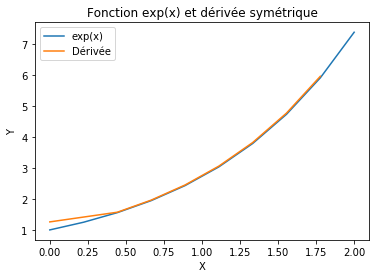

In [11]:
#Données
X= np.linspace(0,2,10)
Y_1 = exp_a(X, 1)
X_der = np.delete(X,-1)
X_der = np.delete(X_der, 1)
Y_der1 = derivee_sym(X, Y_1)

#Tracé du graphique

fig= plt.figure()
plt.plot(X,Y_1, label = 'exp(x)')
plt.plot(X_der,Y_der1, label= 'Dérivée')
plt.title('Fonction exp(x) et dérivée symétrique')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


- Commentez

Plus proche

## Exercice 3 : Série entière de cosinus

La fonction cosinus peut s'écrire sous la forme d'une série entière :

$${\rm cos}(x)=\sum_{n=0}^{+\infty} (-1)^n {\frac{x^{2n}}{2n!}}$$

pour tout $x\in \mathbb{R}$.

- Définissez une fonction pour calculer les factorielles, puis définissez une fonction pour calculer la somme ci-dessus jusqu'à l'ordre $N$ pour un $x$ quelconque.

In [12]:
#fonction factorielle
def fact(n):
    N= 1
    for i in range(1,n+1):
        N= N*i 
    return N

In [13]:
#Développement de cos à l'ordre N
def serie_cos(x ,N):
    S=0
    for i in range(0,N+1):
        S = S + ((-1)**i)*(x**(2*i))/(fact(2*i))
    return S
    

- Tracez la fonction cos fournie par le module numpy pour $x\in [-3\pi,3\pi]$ et superposer le tracé de la série ci-dessus pour $N=2,5,10$. Pensez à zoomer si nécessaire.

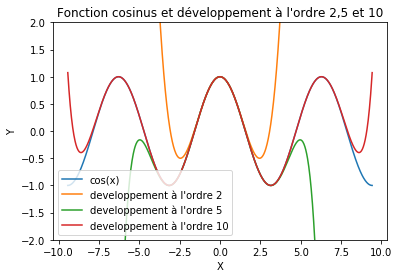

In [14]:
#Données
X= np.linspace(-3*np.pi,3*np.pi,1000)
Y_cos = np.cos(X)
Y_cos_dv2 = serie_cos(X,2)
Y_cos_dv5 = serie_cos(X,5)
Y_cos_dv10 = serie_cos(X,10)

#Tracé du graphique

fig= plt.figure()
plt.plot(X,Y_cos, label = 'cos(x)')
plt.plot(X,Y_cos_dv2, label= "developpement à l'ordre 2" )
plt.plot(X,Y_cos_dv5, label= "developpement à l'ordre 5" )
plt.plot(X,Y_cos_dv10, label= "developpement à l'ordre 10" )
plt.title("Fonction cosinus et développement à l'ordre 2,5 et 10")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.ylim(-2,2)
plt.show()


- Commentez

Plus l'ordre du développement est grand, plus il est proche de cos.

## Exercice 4 : Marche aléatoire à 1D et 2D

Dans cet exercice il s'agit de simuler une marche aléatoire dans un espace unidimensionnel. Au début la particule se trouve dans la position $x=0$ et à chaque étape la particule se déplace aléatoirement d'une quantité $dx$ comprise dans l'intervalle [-1,1[.

- Créez une fonction retournant la position finale d'une particule après N pas

In [15]:
#fonction retournant position après N pas
def pfinale(N):
    x = 0
    for i in range(0,N):
        x= x+ np.random.uniform(-1,1)
    return x

- Représentez sur un histogramme de 100 bins la position finale de 10000 particules après 600 pas.

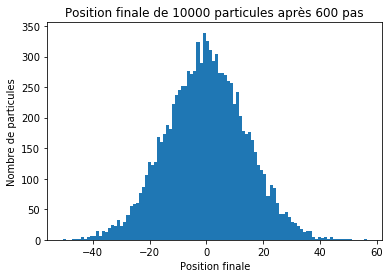

In [20]:
pas = 600

#bornes des bins 
bornes = 100

#Données
Part= np.array([pfinale(pas) for i in range(0,10000)])

#Tracé du graphe
fig= plt.figure()
plt.hist(Part,bins= bornes)
plt.title('Position finale de 10000 particules après 600 pas')
plt.xlabel('Position finale')
plt.ylabel('Nombre de particules')
plt.show()    


- Affichez la valeur moyenne des positions finales et de l'écart type (des fonctions numpy existent !).

In [21]:
print('Moyenne =', np.mean(Part))
print('Ecart type =', np.std(Part))

Moyenne = -0.08122765359257215
Ecart type = 14.065555721083847


- Définissez une fonction gaussienne 
	$$ f(x)= \frac{A}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\bar{x})^2}{2\sigma^2}}$$

In [22]:
#fonction gaussienne
def Gauss(x, A, x_moy, sig) :
    quot = A/((2*np.pi)**0.5*sig)
    ex = np.exp(-(x-x_moy)**2/(2*sig**2))
    return quot*ex
    

- Superposez cette fonction gaussienne à l'histogramme calculé précédemment. Vous prendrez pour $\bar{x}$ et $\sigma$ la moyenne et l'écart type calculés précédemment. Pour $A$ vous choisirez la valeur:
	$$A=dX\times N_{particules}$$
	où $dX$ est la largeur des bins de l'histogramme et $N_{particules}$ est le nombre de particules. 

In [23]:
pas = 600
N = 10000
Part= np.array([pfinale(pas) for i in range(0,N)])

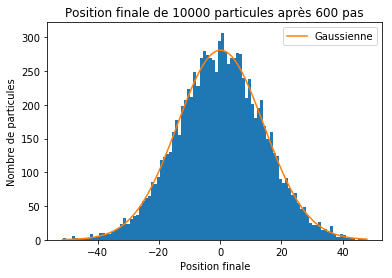

In [24]:
#Données
dX= (max(Part)-min(Part))/bornes
A = dX*N
x_moy = np.mean(Part)
sig= np.std(Part)

#liste point
X = np.linspace(min(Part),max(Part),100)
Y_Gauss= Gauss(X, A, x_moy, sig)

#Tracé du graphe
fig= plt.figure()
plt.hist(Part,bins= bornes)
plt.plot(X,Y_Gauss, label='Gaussienne')
plt.title('Position finale de 10000 particules après 600 pas')
plt.xlabel('Position finale')
plt.ylabel('Nombre de particules')
plt.legend()
plt.show() 


Comment évolue la variance de la distribution, $\sigma^2$, en fonction du nombre de pas?

[ 4.09543793  5.80768374 12.91675373 18.30590173]


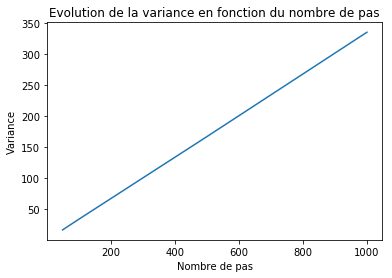

In [25]:
Aragorn = np.array([50,100,500,1000])#Nombre de pas
SIG =np.zeros(len(Aragorn))
for z in range(len(Aragorn)) :
    PartS= np.array([(pfinale(Aragorn[z])) for i in range (0,N)]) #Créer N position finales après Aragorn pas
    SIG[z] = np.std(PartS) #liste des écarts types
print(SIG)
var = SIG**2

#Tracé du graphique

fig= plt.figure()
plt.plot(Aragorn,var)
plt.title('Evolution de la variance en fonction du nombre de pas')
plt.xlabel('Nombre de pas')
plt.ylabel('Variance')
plt.show()

Passons sur un réseau à 2 dimensions. Un pas correspond à un déplacement de la particule de dx suivant l'axe des x et de dy suivant l'axe des y, où dx et dy sont uniofrmément réparti en -1 et 1.

Construisez les listes des coordonnées x et y des différentes points de la trajectoire de la particule. La trajectoire sera ensuite représentée dans un graphique par un trait continu. Vous pouvez choisir de représenter une trajectoire de 600 pas.

In [26]:
#fonction retournant position après N pas
def Deplac2D(N):
    dx = np.array([np.random.uniform(-1,1) for i in range(N)]) #liste de N dx
    dy= np.array([np.random.uniform(-1,1) for i in range(N)])
    marcheX = np.cumsum(dx) #somme cumulable
    marcheY = np.cumsum(dy)
    return marcheX, marcheY



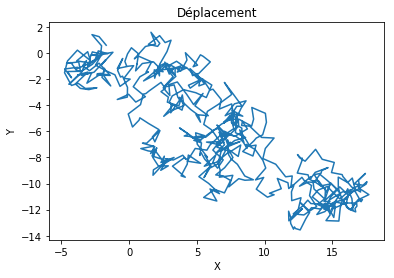

In [29]:
pas= 600
X,Y= Deplac2D(pas)

#Tracé du graphique

fig= plt.figure()
plt.plot(X,Y)
plt.title('Déplacement')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Comme pour la marche aléatoire 1D, créez une fonction calculant la distance entre l'origine et la position finale pour une particule, puis tracer l'histogramme de cette distance finale pour 10000 particules.

La distribution obtenue suit une loi dite de Rayleigh:
	$$ f(x)= A\frac{x}{\sigma^2}e^{-\frac{x^2}{2\sigma^2}}$$
dont la variance est égale à $\sigma^2\times(2-\pi/2)$. Superposez cette fonction à l'histogramme en choisissant $A$ de manière appropriée (cf. 1D).

In [88]:
#fonction retournant position après N pas
def DistFinale(N):
    dx = np.array([np.random.uniform(-1,1) for i in range(N)]) #liste de N dx
    dy= np.array([np.random.uniform(-1,1) for i in range(N)])
    x_fin = sum(dx)
    y_fin = sum(dy)
    return np.sqrt(x_fin**2+y_fin**2)

In [95]:
#fonction Rayleigh
def Ray(x,A,sig) :
    quot = A*x/(sig**2)
    ex= np.exp(-(x**2)/(2*sig**2))
    return quot*ex

In [92]:
pas = 600
Npart = 10000
PosFinPart= np.array([DistFinale(pas) for i in range(0,Npart)]) #Un tableau de de Npart positions finales

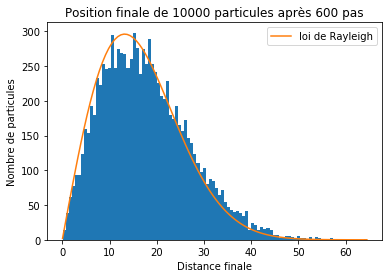

In [108]:
#Données
bornes=100
dX= (max(PosFinPart)-min(PosFinPart))/bornes
A = dX*Npart
sig= np.std(PosFinPart)*2**0.5

#liste point
X = np.linspace(min(PosFinPart),max(PosFinPart),100)
Y_Ray= Ray(X, A, sig)


#Tracé du graphe
fig= plt.figure()
plt.hist(PosFinPart,bins= bornes)
plt.plot(X,Y_Ray, label='loi de Rayleigh')
plt.title('Position finale de 10000 particules après 600 pas')
plt.xlabel('Distance finale')
plt.ylabel('Nombre de particules')
plt.legend()
plt.show() 


Tracez $\sigma^2$ en fonction du nombre de ps et comparez au cas 1D

In [110]:
Aragorn = np.array([50,100,500,1000])#Nombre de pas
SIG =np.zeros(len(Aragorn))
for z in range(len(Aragorn)) :
    PartS= np.array([(DistFinale(Aragorn[z])) for i in range (0,Npart)]) #Créer N distances finales après Aragorn pas
    SIG[z] = np.std(PartS) #liste des écarts types pour les nombres de pas différents


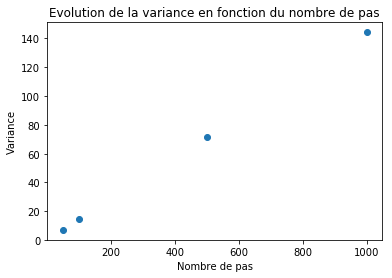

In [111]:
#Tracé du graphique

fig= plt.figure()
plt.scatter(Aragorn,SIG**2)
plt.title('Evolution de la variance en fonction du nombre de pas')
plt.xlabel('Nombre de pas')
plt.ylabel('Variance')
plt.show()